# Материалы

Презентация: https://drive.google.com/file/d/1uAPW1WvNwtA3Z_lPxjmhptSa-BIyyazc/view?usp=share_link

# Цель исследования
  **Выделение групп пользователей на основе поведения.** Ответить на вопросы:
  - Пользователи какой группы склонны часто возвращаться в мобильное приложение?
  - Пользователя какой группы часто делают целевое событие?

## Ход исследования 
   - **Знакомство с данными:**
     - Выгрузка данных
     - Визуализация данных
   - **Предобработка данных:**
     - Приведение наименований к единому регистру
     - Обработка дубликатов
     - Обработка пропусков
     - Выделение необходимых для исследования данных из имеющихся
     - Вывод о предоставленных данных 
   - **Исследовательский анализ данных**:
     - Поведение пользователей:
       - retention rate
       - время, проведённое в приложении
       - частота действий
       - конверсия в целевое действие 
     - Сегментация пользователей
     - Выводы исследовальского анализа
   - **Вывод**
     - Ответы на основные вопросы
     - Рекомендации
   - **Проверка гипотез**:
     - Пользователи из yandex и google демонстрируют разную конверсию
     - Пользователи из yandex и google демонстрируют разную возвращаемость


# Знакомство с данными 

## Выгрузка данных

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from plotly import graph_objects as go
from datetime import datetime, timedelta
from scipy import stats as st
import numpy as np
import math as mth
import copy

pd.options.display.float_format = '{:.3f}'.format
pd.set_option('mode.chained_assignment', None)

In [ ]:
sourсes = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_soures.csv')
mobile_df = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_dataset.csv')

## Изучение данных

In [ ]:
display (sourсes.head(10))
sourсes.info()

display (mobile_df.head(10))
mobile_df.info()

,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google
5,17f6b2db-2964-4d11-89d8-7e38d2cb4750,yandex
6,62aa104f-592d-4ccb-8226-2ba0e719ded5,yandex
7,57321726-5d66-4d51-84f4-c797c35dcf2b,google
8,c2cf55c0-95f7-4269-896c-931d14deaab5,google
9,48e614d6-fe03-40f7-bf9e-4c4f61c19f64,yandex


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c
5,2019-10-07 00:01:19.993624,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
6,2019-10-07 00:01:27.770232,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
7,2019-10-07 00:01:34.804591,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
8,2019-10-07 00:01:49.732803,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c
9,2019-10-07 00:01:54.958298,advert_open,020292ab-89bc-4156-9acf-68bc2783f894


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [ ]:
print ('Всего типов событий:',mobile_df['event.name'].nunique())

Всего типов событий: 16


In [ ]:
print ('Среднее количество событий на пользователя:', mobile_df['event.name'].count()/mobile_df['user.id'].nunique())

Среднее количество событий на пользователя: 17.283251805264385


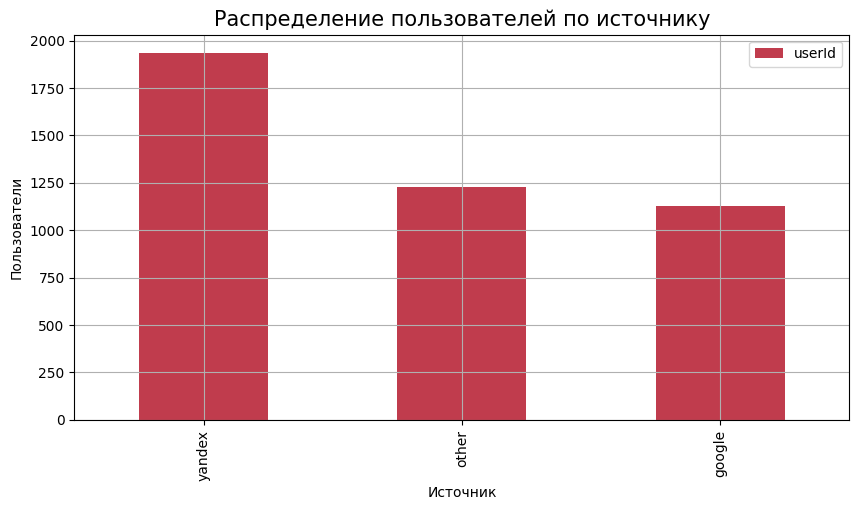

In [ ]:
sourсes.groupby(['source']).agg({'userId': 'count'}).sort_values(by='userId', ascending = False).plot(
    kind='bar', grid=True, 
    figsize=(10, 5), color='#c03c4d')

plt.title('Распределение пользователей по источнику', fontsize=15) 
plt.ylabel('Пользователи', fontsize=10)
plt.xlabel('Источник', fontsize=10)
plt.show()

 - **В датасетах представлена информация о 74 197 событиях 9ти типов и 4 293 пользователях. Пропусков в данных нет** 
 - **В среднем на пользователя приходится 17 событий**
 - **Большая часть пользователей пришли из Яндекса**
 - **Типы данных в столбцах представлены преимущественно корректно, однако event.time мы можем привести для удобства работы к типу datetime**

# Предобработка данных

## Приведение наименований к единому регистру

In [ ]:
sourсes = sourсes.rename(columns={'userId':'user_id'})

In [ ]:
mobile_df = mobile_df.rename(columns={'event.time':'event_time', 'event.name':'event_name', 'user.id':'user_id'})

## Коррекция типов данных

In [ ]:
mobile_df['event_time'] = mobile_df['event_time'].astype('datetime64')

## Обработка дубликатов

In [ ]:
mobile_df[mobile_df.duplicated()]

,event_time,event_name,user_id


In [ ]:
sourсes[sourсes.duplicated()]

,user_id,source


**Явных дубликатов не обнаружено.** 

## Выделение данных

### Сессии

Для будущего исследования, выделим сессии относительно тайм-аута. Зададим порог в 40 минут - если между event_time больше 40 минут, то будем считать это разными сессиями. Зададим уникальный id для каждой сессии.

In [ ]:
#сортируем датасет для корректного расчета
mobile_df = mobile_df.sort_values(['user_id', 'event_time']) 

#группируем и определяем разницу в 40 минут в сумме для каждой группы 
group = (mobile_df.groupby('user_id')['event_time'].diff() > pd.Timedelta('40Min')).cumsum()

#создаем счетчик для групп
mobile_df['session_id'] = mobile_df.groupby(['user_id', group], sort=False).ngroup() + 1

### Поиск

Объеденим все 7 вариантов поиска в один search

In [ ]:
mobile_df.loc[mobile_df['event_name'].str.contains('search'), 'event_name'] = 'search'

### Просмотр контакта

В event_name есть два обозначения просмотра контактов - contacts_show и show_contacts. Объеденим их

In [ ]:
mobile_df.loc[mobile_df['event_name'] == 'show_contacts', 'event_name'] = 'contacts_show'

## Объеденение датасетов

Для удобства, создадим единый датасет - объеденим их по user_id

In [ ]:
df = mobile_df.merge(
    sourсes[['user_id', 'source']], on='user_id', how='left')

**Данные готовы к работе**

# Исследовательский анализ данных

## Поведение пользователей

### Retention Rate

#### Вычисления

Для вычисления Retention Rate найдем дату первого посещения для каждого пользователя

In [ ]:
df['session_start'] = df.loc[df.groupby('user_id')['event_time'].idxmin(),'event_time'] = df['event_time']

Найдем профили пользователей

In [ ]:
profiles = (
        df.sort_values(by=['user_id', 'session_start']) # сортируем сессии по id пользователя и дате первого посещения
        .groupby('user_id') # группируем по ID и находим первые значения session_start и source
        .agg({'session_start': 'first', 'source': 'first'})
        .rename(columns={'session_start':'first_ts'}) # столбец с временем первого посещения назовём first_ts
        .reset_index() # возвращаем user_id из индекса
    ) 

profiles['dt'] = profiles['first_ts'].dt.date # определяем дату первого посещения
profiles['day'] = profiles['first_ts'].astype('datetime64[D]') # и первый день месяца, в который это посещение произошло

Присоединяем session_start к профилям по столбцу user_id

In [ ]:
result_raw = profiles.merge(
    df[['user_id', 'session_start']], on='user_id', how='left')

Вычисляем лайфтайм для каждой сессии в днях


In [ ]:
result_raw['lifetime'] = (
    result_raw['session_start'] - result_raw['first_ts']).dt.days

Cтроим таблицу удержания

In [ ]:
result_grouped = result_raw.pivot_table(
    index=['dt'], columns='lifetime', values='user_id', aggfunc='nunique')

Вычисляем размеры когорт

In [ ]:
cohort_sizes = (
    result_raw.groupby('dt')
    .agg({'user_id': 'nunique'})
    .rename(columns={'user_id': 'cohort_size'}))

Объединяем размеры когорт и таблицу удержания

In [ ]:
result_grouped = cohort_sizes.merge(
    result_grouped, on='dt', how='left').fillna(0)

Делим данные таблицы удержания на размеры когорт

In [ ]:
result_grouped = result_grouped.div(
    result_grouped['cohort_size'], axis=0)

#### Визуализация

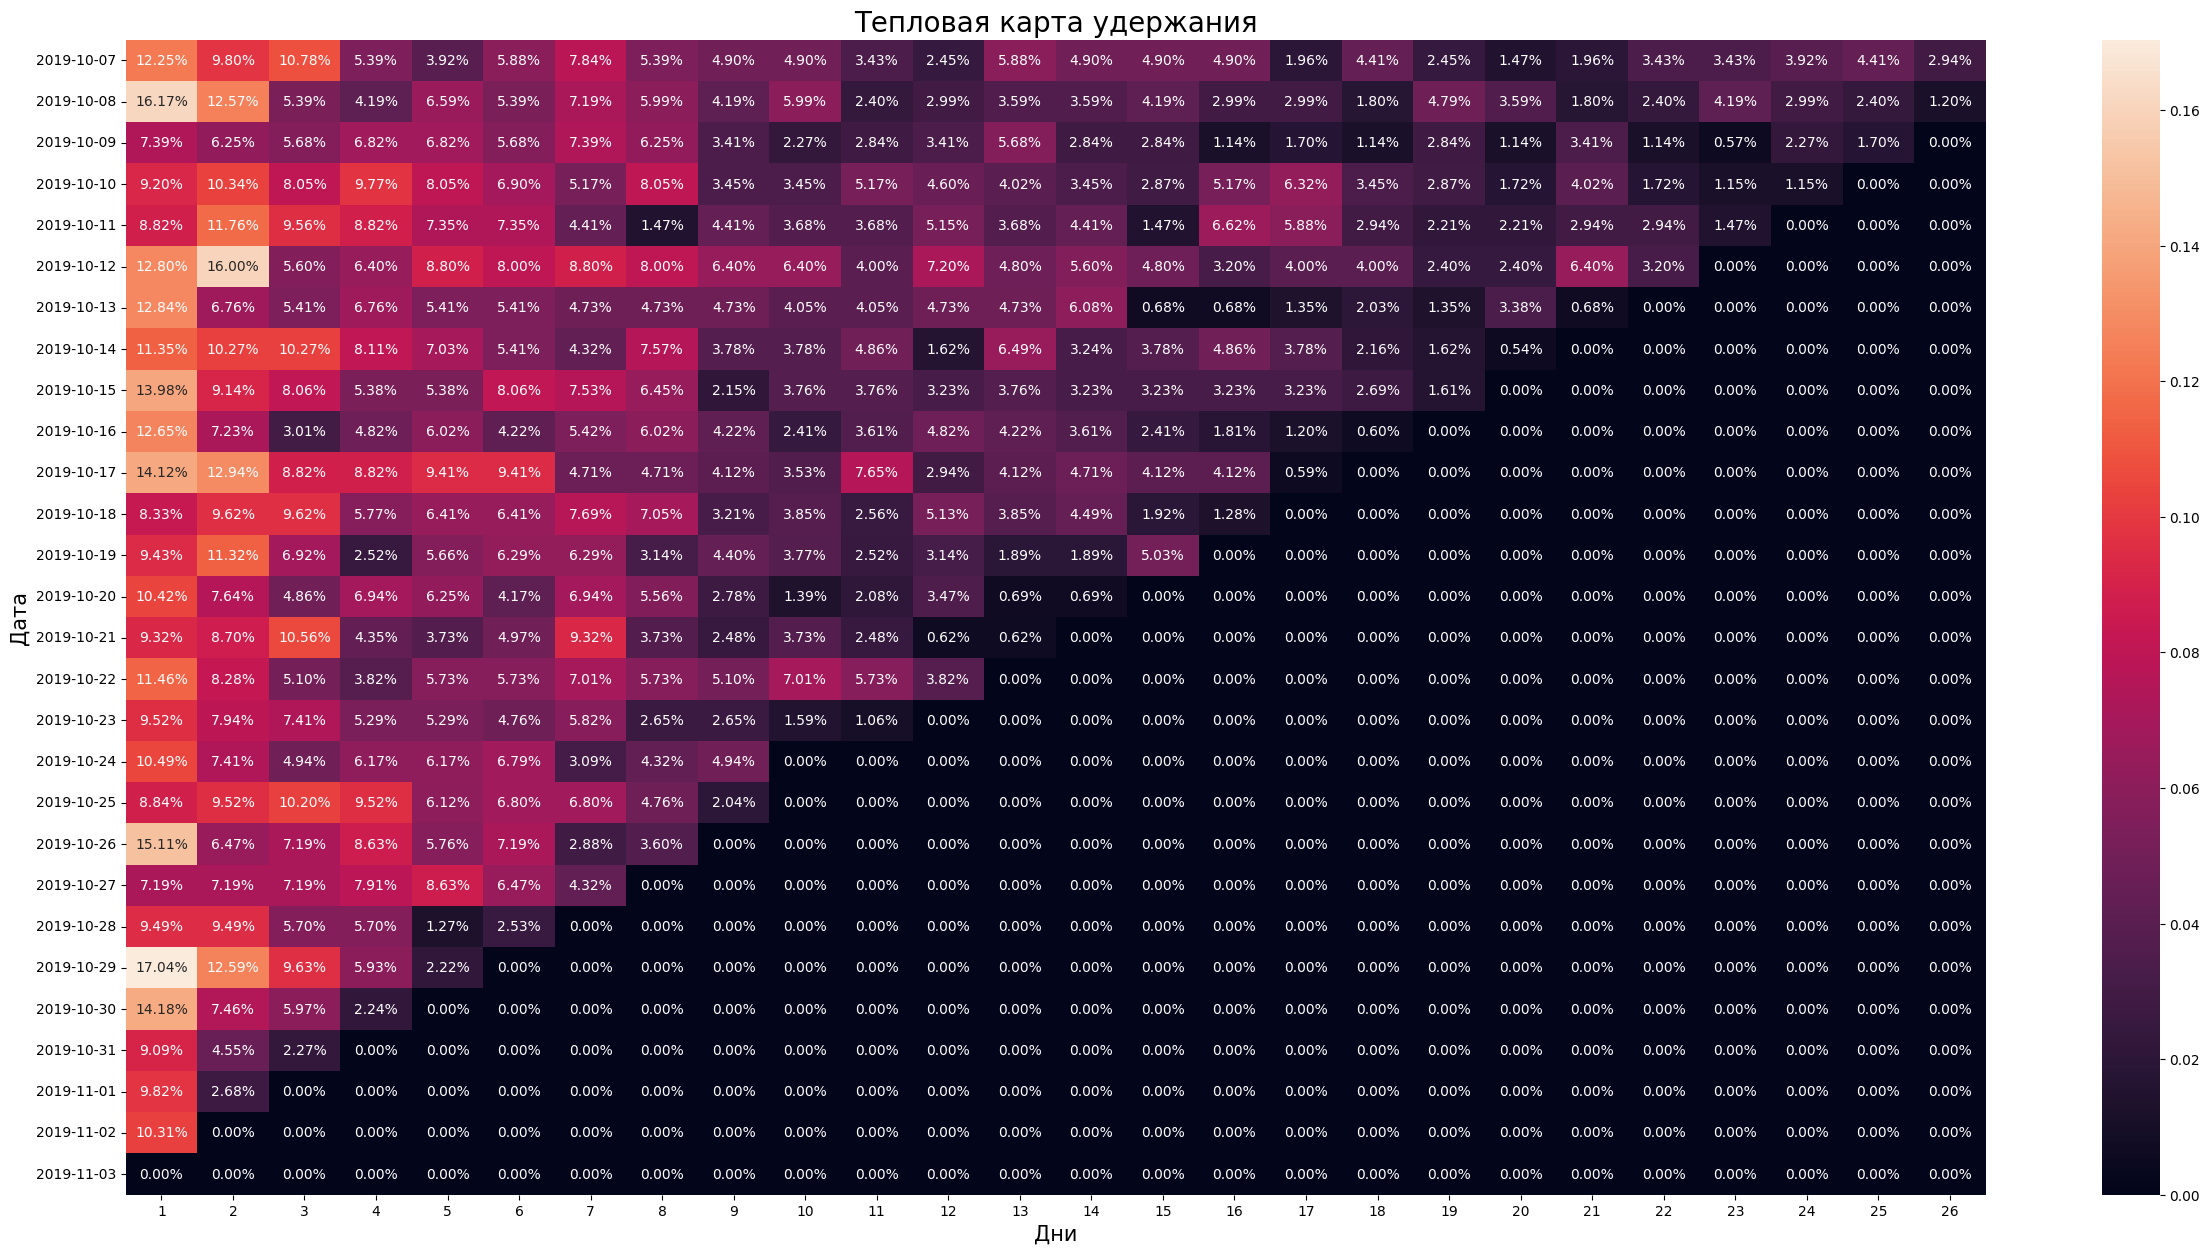

In [ ]:
plt.figure(figsize=(30, 15))  # задаём размер графика
sns.heatmap(
    result_grouped.drop(columns=['cohort_size', 0]),  # удаляем размеры когорт и первый день
    annot=True,  # включаем подписи
    fmt='.2%',  # переводим значения в проценты
)
plt.title('Тепловая карта удержания', fontsize=20) 
plt.ylabel('Дата', fontsize=15)
plt.xlabel('Дни', fontsize=15)
plt.show()

**На второй день процент возврата составляет максимум 17%, а на третий 16%. Хорошие результы мы видим у кагорты от 17.10 - ее показатели хоть и лучшие, но достаточно стабильные.**

### Время, проведённое в приложении

#### Общее время пользователя

##### Вычисления

Вычислим время, проведенное на странице, руководствуясь временем посещения следующей страницы

In [ ]:
df['time_on_page'] = df.groupby(['session_id'])['event_time'].diff(1) #считаем разницу между предыдущей и следующей страницей внутри сессии
df['time_on_page'] = df.groupby(['session_id'])['time_on_page'].shift(-1) #сдвигаем значение столбца time_on_page на одну строку вверх внутри отдельно взятой сессии
df['time_on_page'] = df['time_on_page'].dt.seconds/60 #переводим время в минуты

Найдем время и количество сессий для каждого клиента

In [ ]:
time_by_user = df.pivot_table(values='time_on_page', index='user_id', aggfunc='sum') #суммарное время для каждого пользователя 
time_by_user['sessions'] = df.pivot_table(values='session_id', index='user_id', aggfunc='nunique') #количество сессий для каждого пользователя
time_by_user = time_by_user[time_by_user['time_on_page'] != 0] #удаляем нулевые значения
time_by_user['user_id'] = time_by_user.index

Визуализируем время для каждого пользователя и количество сессий 

##### Визуализация

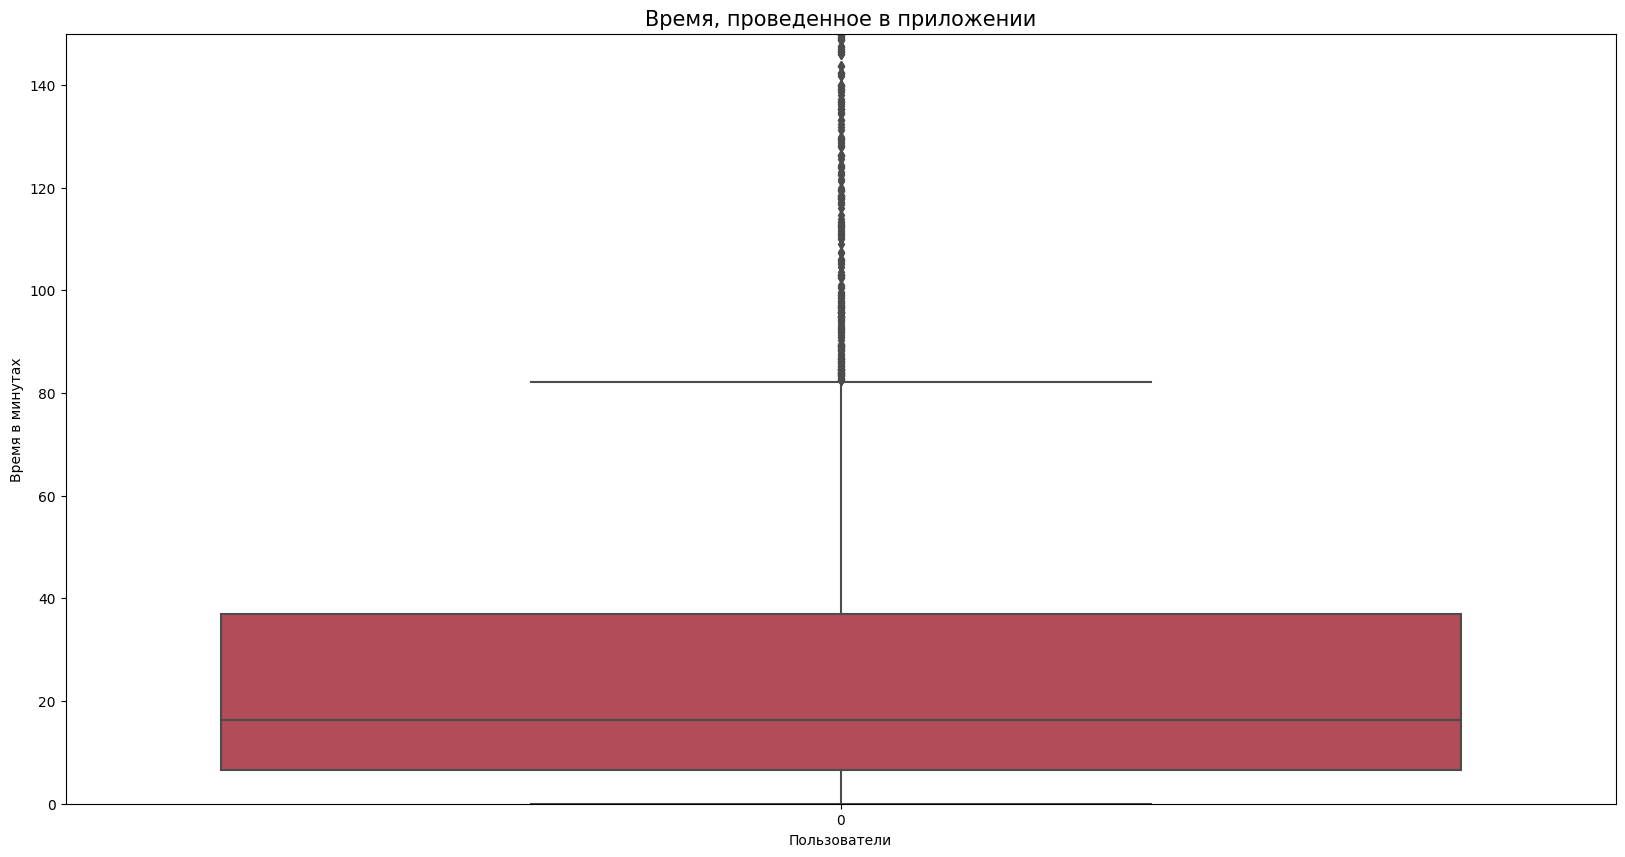

In [ ]:
plt.figure(figsize=(20,10))

sns.boxplot(data=time_by_user['time_on_page'], color='#c03c4d')

plt.ylim(0,150)
plt.title('Время, проведенное в приложении', fontsize=15)
plt.xlabel('Пользователи', fontsize=10)
plt.ylabel('Время в минутах', fontsize=10)

plt.show()

In [ ]:
time_by_user['time_on_page'].describe()

count   4204.000
mean      34.424
std       70.423
min        0.017
25%        6.612
50%       16.300
75%       36.933
max     1886.550
Name: time_on_page, dtype: float64

Среднее суммарное время для пользователей - 34,42, а медианное - 16,3. Медиана для нас более предпочительна, так как у в распределении явно имеют место быть истинные фанаты приложения.

In [ ]:
time_by_user['sessions'].describe()

count   4204.000
mean       2.353
std        3.383
min        1.000
25%        1.000
50%        1.000
75%        2.000
max       93.000
Name: sessions, dtype: float64

Среднее количество сессий пользователей - 2,3, а медианное - 1. В прочем, есть и рекорсмены - максимальное количество сессий - 93.

#### Время сессий 

Посчитаем длительность каждой сессии 

In [ ]:
time_by_session = df.pivot_table(values='time_on_page', index='session_id', aggfunc='sum').reset_index() #суммарное время каждой сессии

Проверим распределение нулевых значений по событиям

In [ ]:
display (df['event_name'][df['time_on_page']==0].value_counts())

photos_show      895
tips_show        367
search           238
map              176
contacts_show    172
advert_open       54
favorites_add     12
contacts_call      8
tips_click         5
Name: event_name, dtype: int64

Так как нулевые значения встречаются на всех событиях, можем предположить, что это системный сбой. Исключим их перед визулизацией:

In [ ]:
time_by_session = time_by_session[time_by_session['time_on_page'] != 0] 

Визуализируем распределение количества времени сессий

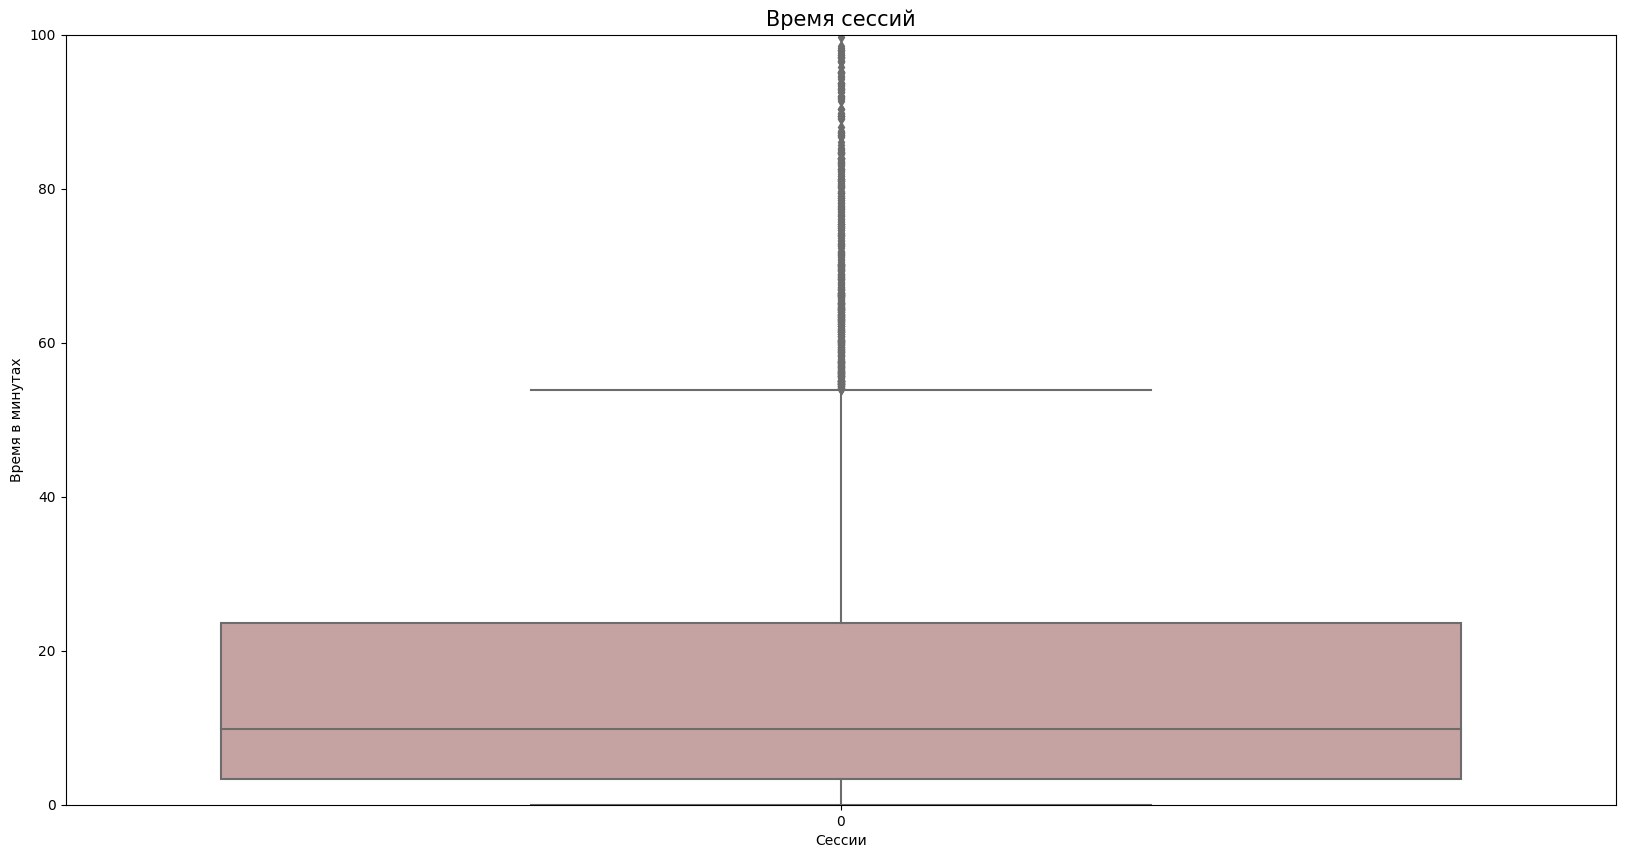

In [ ]:
plt.figure(figsize=(20,10))

sns.boxplot(data=time_by_session['time_on_page'], color='#cc9d9d')

plt.ylim(0,100)
plt.title('Время сессий', fontsize=15)
plt.xlabel('Сессии', fontsize=10)
plt.ylabel('Время в минутах', fontsize=10)

plt.show()

In [ ]:
time_by_session['time_on_page'].describe()

count   8022.000
mean      18.040
std       24.529
min        0.017
25%        3.350
50%        9.825
75%       23.567
max      365.233
Name: time_on_page, dtype: float64

Среднее время сессии - 18 минут, а медианное - 10. Выбросов, как и в графике распределения общего времени, достаточно много. 

### Частота действий

#### Вычисления

Создадим таблицу с количеством дейcтвий для каждого пользователя - *events*, сгруппировав их про *user_id*

In [ ]:
events = (
    df.groupby(['user_id'])
    .agg({'event_name': 'count'})
    .rename(columns={'event_name': 'events'})
    .sort_values(by='events', ascending = False)
    .reset_index())

Так же будет полезно посмотреть, какие действия в целом наиболее популярны. Для этого сгруппируем действия и определим количество юзеров для каждого из них:

In [ ]:
event_distribution = (
    df.groupby(['event_name'])
    .agg({'user_id': 'count'})
    .rename(columns={'user_id': 'users'})
    .sort_values(by='users', ascending = False)
    .reset_index())

Так же сгруппируем количество событий по дням недели:

In [ ]:
df_date = copy.copy(df)
df_date['event_time'] = df_date['event_time'].dt.day_name()

event_date = (
     df_date.groupby(['event_time'])
    .agg({'event_name': 'count'})
    .rename(columns={'event_name': 'events'})
    .sort_values (by='events', ascending = False)
    .reset_index())

#### Визуализация

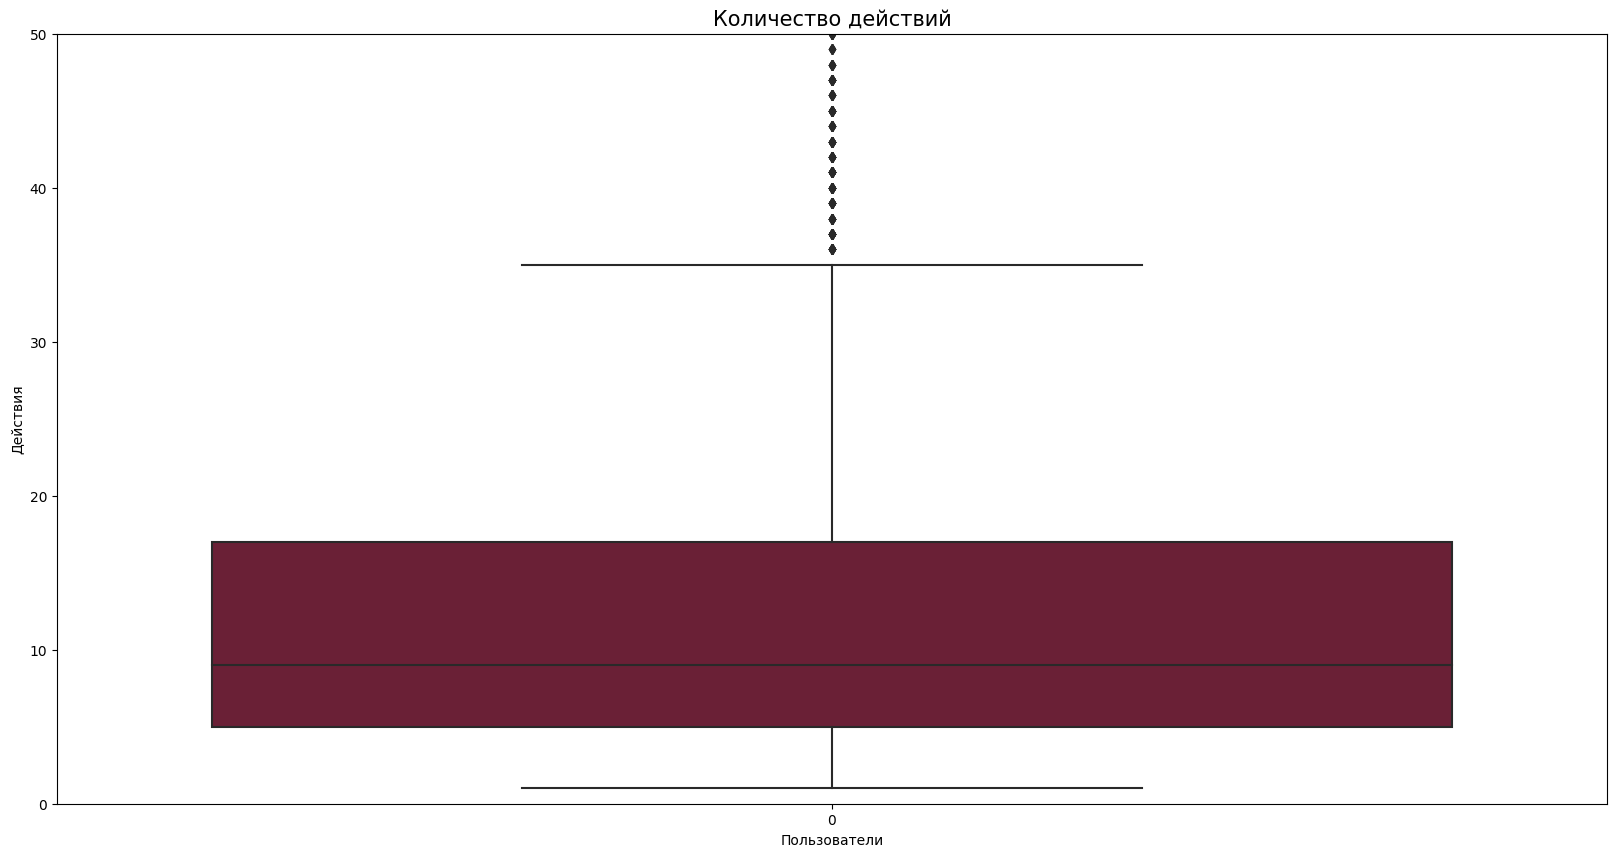

In [ ]:
plt.figure(figsize=(20,10))

sns.boxplot(data=events['events'], color='#761431')

plt.ylim(0,50)
plt.title('Количество действий', fontsize=15)
plt.xlabel('Пользователи', fontsize=10)
plt.ylabel('Действия', fontsize=10)

plt.show()

In [ ]:
events['events'].describe()

count   4293.000
mean      17.283
std       29.131
min        1.000
25%        5.000
50%        9.000
75%       17.000
max      478.000
Name: events, dtype: float64

В среднем, пользователи делают 17 действий, а медианно - 9. Выбросов, как и раньше, достаточно много. Однако, такое распределение подтверждается распределением количества сессий для пользователя.

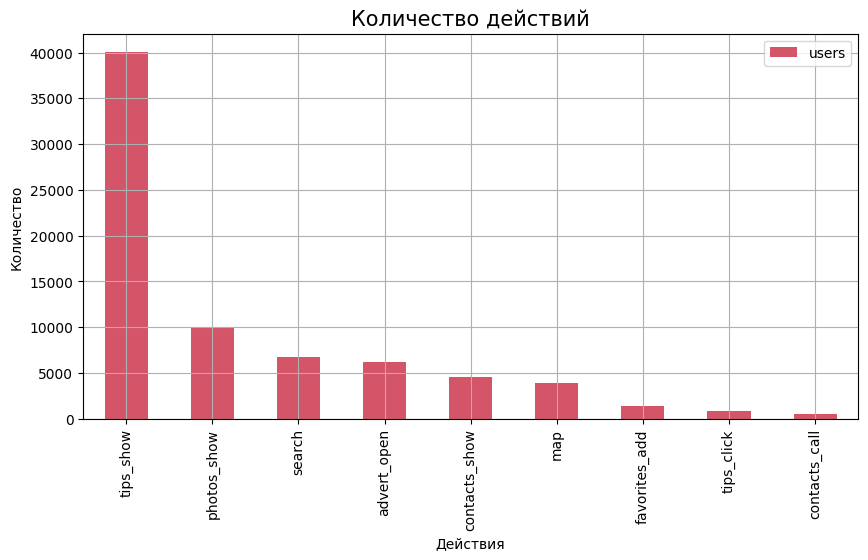

In [ ]:
event_distribution.sort_values(by='users', ascending=False).plot(
    x='event_name', y='users',
    kind='bar', figsize=(10, 5), grid=True,
    color = '#d45468', fontsize=10
) 

plt.title('Количество действий', fontsize=15)
plt.ylabel('Количество', fontsize=10)
plt.xlabel('Действия', fontsize=10)
plt.show()

**Самое частое действие - просмотр рекомендованных объявлений - более 40 000.** Это неудивитльно, это одна из основных механик приложения.**На втором месте просмотр фото в объявлении - 10 000, в 4 раза реже просмотра.** Далее частота снижается более плавно. **До показа контакта доходят менее 5000, а до звонка напрямую из приложения - немногим более 500.**

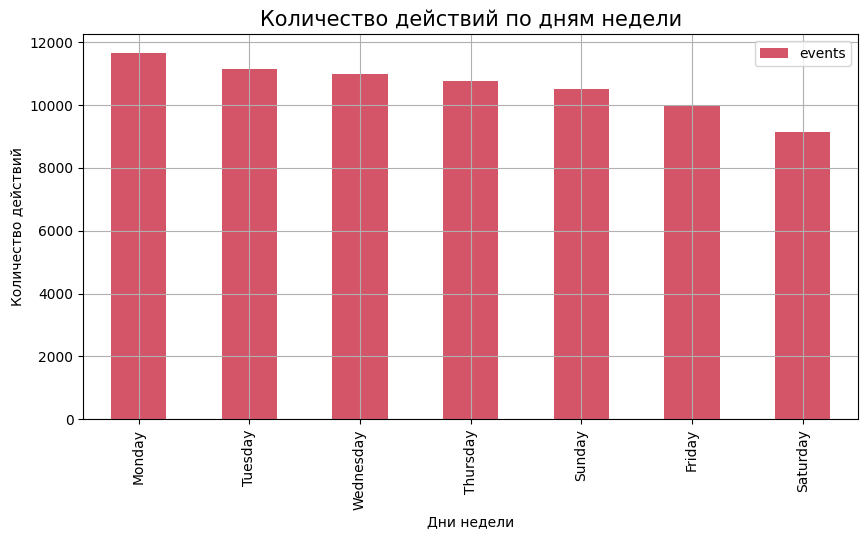

In [ ]:
event_date.plot(
    x='event_time', y='events',
    kind='bar', figsize=(10, 5), grid=True,
    color = '#d45468', fontsize=10
) 

plt.title('Количество действий по дням недели', fontsize=15)
plt.ylabel('Количество действий', fontsize=10)
plt.xlabel('Дни недели', fontsize=10)

plt.show()

Самые активные дни - понедельник и вторник.

### Конверсия в целевое действие

Найдем количество уникальных юзеров для каждого события

In [ ]:
def users_by_event(event):
    users = df[df['event_name'] == event]['user_id'].nunique() 
    return users

event_distribution['users'] = event_distribution['event_name'].apply(users_by_event) #количество уникальных юзеров
event_distribution['percent'] = event_distribution['users'].apply(lambda x: round(x/df['user_id'].nunique()*100, 2)) #процент юзеров

Визуализируем конверсию уникальных пользователей в события

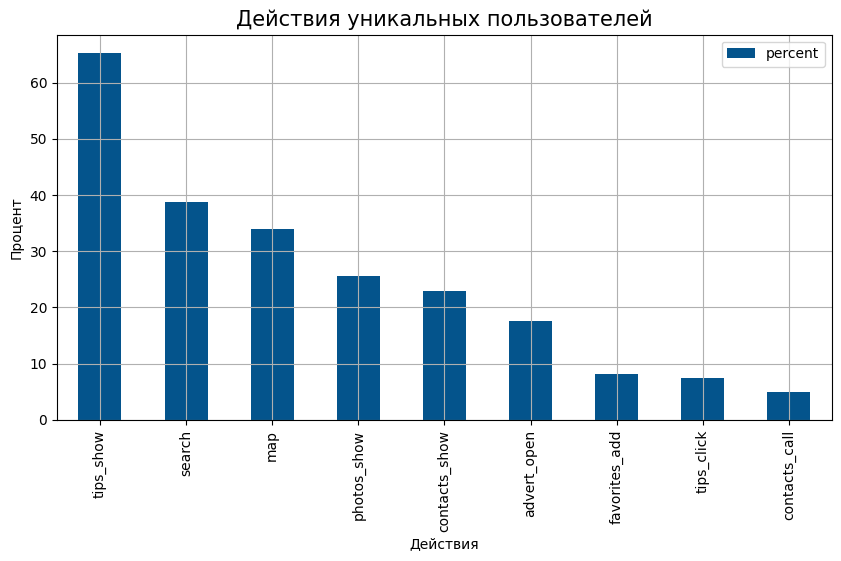

In [ ]:
event_distribution.sort_values(by='percent', ascending=False).plot(
    x='event_name', y='percent',
    kind='bar', figsize=(10, 5), grid=True,
    fontsize=10, color=('#04548c')
) 

plt.title('Действия уникальных пользователей', fontsize=15)
plt.ylabel('Процент', fontsize=10)
plt.xlabel('Действия', fontsize=10)
plt.show()

In [ ]:
event_distribution

,event_name,users,percent
0,tips_show,2801,65.250
1,photos_show,1095,25.510
2,search,1666,38.810
3,advert_open,751,17.490
4,contacts_show,981,22.850
5,map,1456,33.920
6,favorites_add,351,8.180
7,tips_click,322,7.500
8,contacts_call,213,4.960


**Конверсия уникального пользователя в целевое действие 22.85%**

### Вывод о поведении пользователей

Выводы о поведении пользователей в приложении:
*   Медианное суммарное время в приложении около 16 минут
*   Медианное время сессии - 10 минут 
*   Типичный пользователь провел 1 сессию и совершил 9 действий в прилолжении
*   Самые часто выполняемые действия - просмотр рекомендованных объявлений, просмотр фото в объявлении и поиск
*   Самые активные дни недели в приложении - понедельник и вторник
*   22.85 % уникальных пользователей выполняют ключевое действие - просмотр контактов








# Сегментация пользователей

Наиболее яркая и показательная для нас метрика - количество действий в приложении. За параметром количества дейстсвий в приложении мы можем проследить вовлеченность пользователя, а так же его намерения.  Более того, она перекликается со временем, проведенным в приложении, что для нас так же важно.

Предположительно, возвращаемость пользователей с наибольшим количеством действий лучше, чем у остальных, однако конверсия в целевое действие - меньше. 
Проверим это предположение ниже.

Разделим пользователей на три группы:

1.   От 1 до 9 действий (group1). "Медианные" пользователи 
2.   От 9 до 17 действий (group2). "Средние" пользователи 
3.   От 17 действий (group3). Пользователи "выше среднего"



In [ ]:
def group(x): 
    if x <= 9:
        return 'group1'
    elif x > 9 and x <= 17:
        return 'group2'
    else:
        return 'group3'

events['group'] = events['events'].apply(group) 

Проверим распределение по группам

In [ ]:
events.groupby(['group']).agg({'user_id':'count'}).sort_values(by='user_id', ascending = False)

,user_id
group,
group1,2245
group3,1051
group2,997


В первой группе предскауземо больше всего юзеров. Однако проверим, на сколько они для нас "качественные"

## Подготовка данных

Добавим к профилям пользователей информацию о распределении по группам

In [ ]:
profiles = profiles.merge(events, on='user_id', how='left')

Так же создадим датасет с информацией о юзерах, совершивших ключевое действие (для анализа конверсии)

In [ ]:
convers_users = df.query('event_name == "contacts_show"')

Добавим обозначение пользователей, совершивших целевое действие, в профили 

In [ ]:
profiles['conv'] = profiles['user_id'].isin(convers_users['user_id'].unique())

Функция для просчета retantion rate по группам 

In [ ]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=True,
):
    
    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

Функция для расчета конверсии в целевое действие 

In [ ]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=True,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первого события для каждого пользователя
    first_purchases = (
        convers_users.sort_values(by=['user_id', 'event_time'])
        .groupby('user_id')
        .agg({'event_time': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_time']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_time'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

Зададим параметры: 



*   **horizon_days** - 14. Двух недель хватит, чтоб понять поведение пользвателей.
*   Для дня наблюдения (**observation_date**) - 2019,10,20, так, в наши наблюдения не попадут пользователи, "не дожившие" до двух недель.



In [ ]:
#observation_date = df['event_time'].max().date() #момент анализа
observation_date = datetime(2019, 10, 20).date()
horizon_days = 15

## Retantion Rate по группам

In [ ]:
dimensions=['group']

retention_raw, retention_grouped, retention_in_time = get_retention(
    profiles, df, observation_date, horizon_days, dimensions)

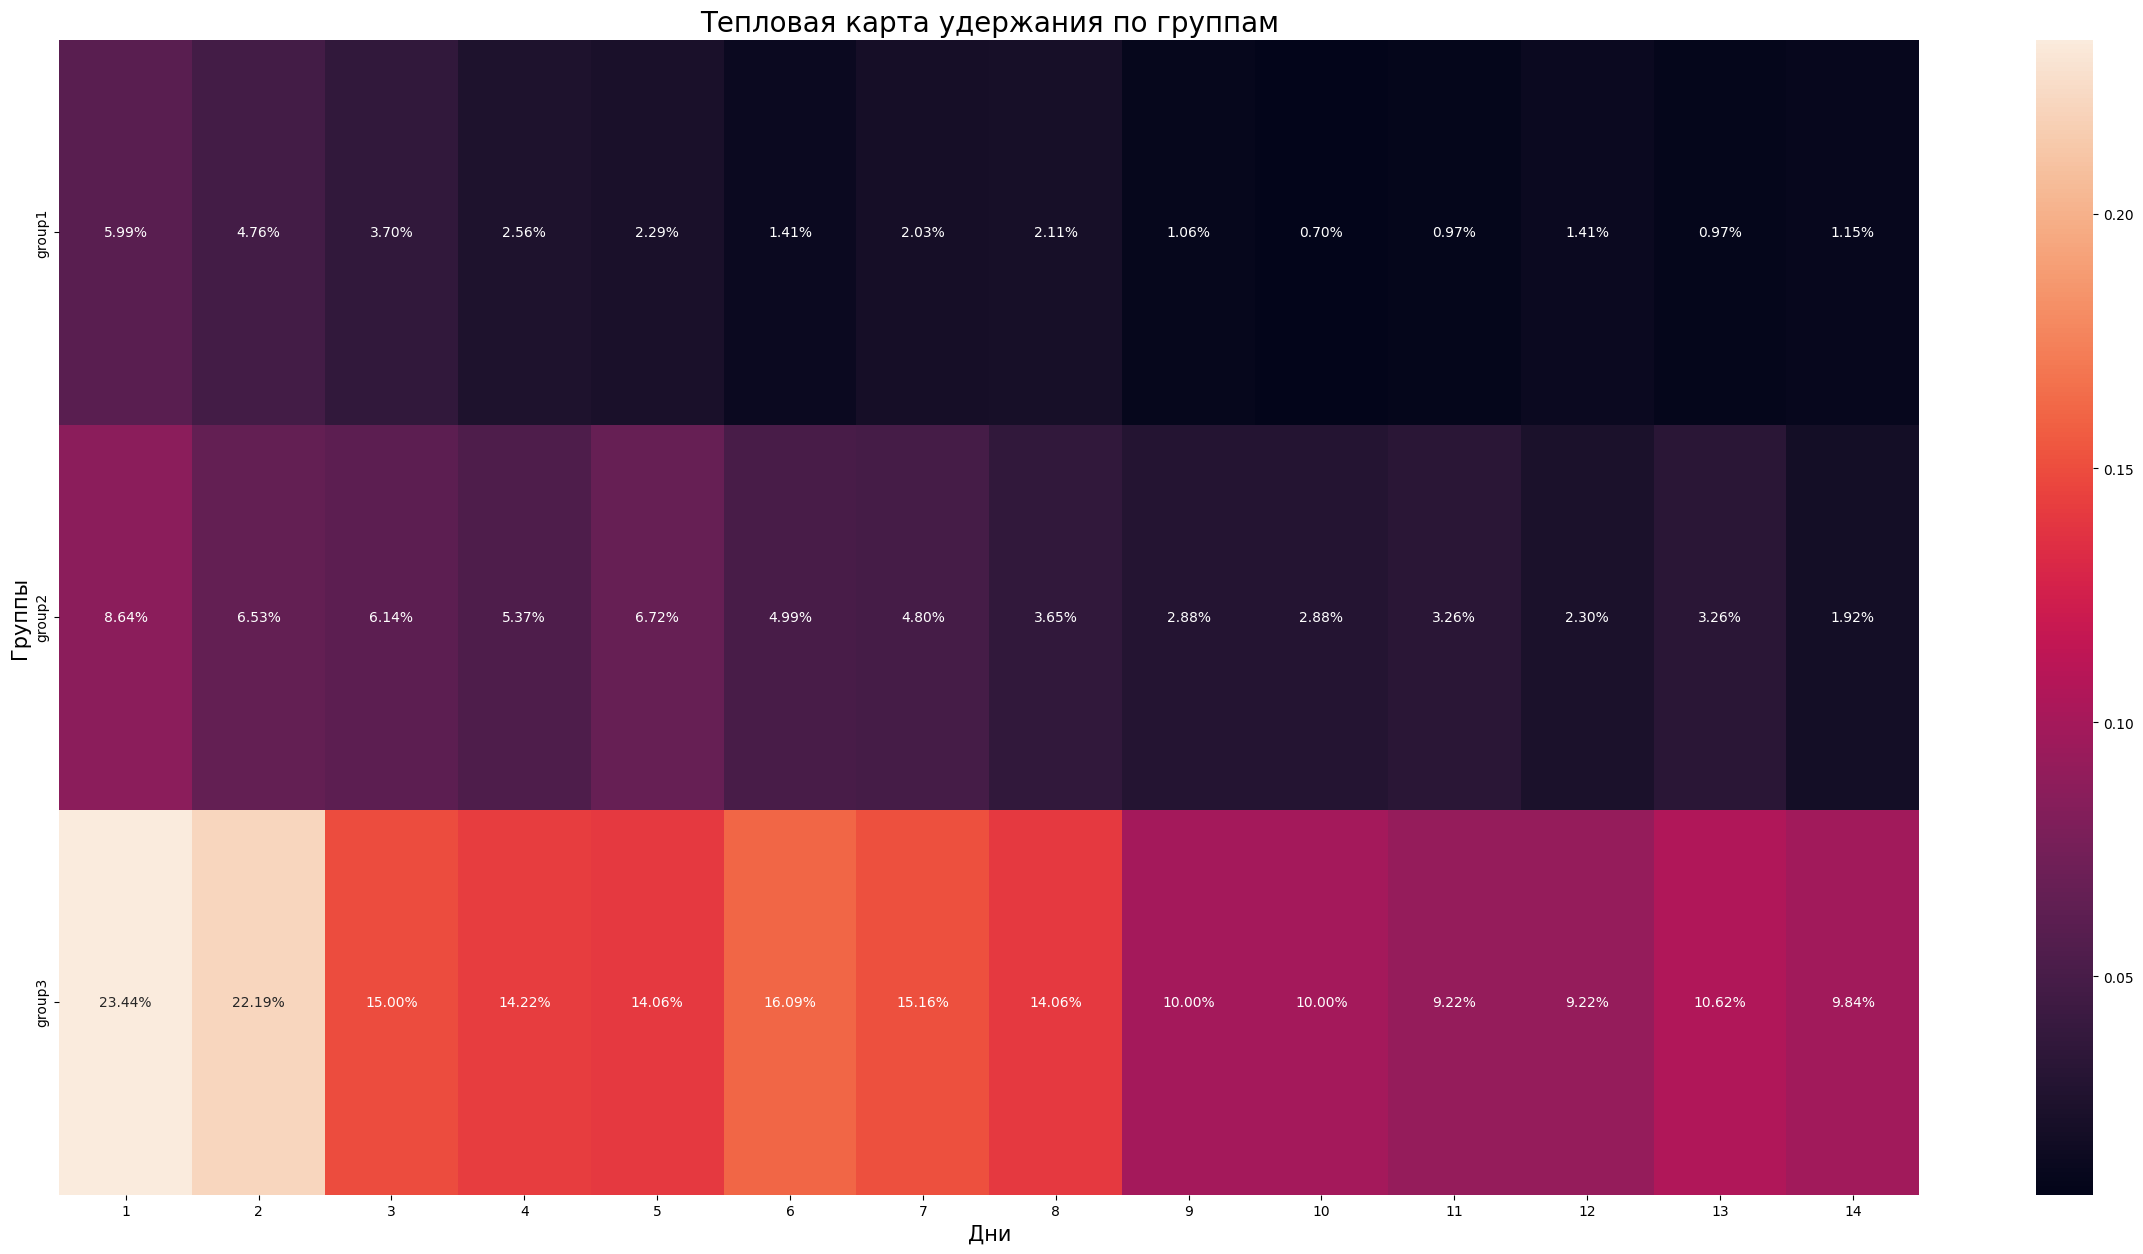

In [ ]:
plt.figure(figsize=(30, 15))  # задаём размер графика
sns.heatmap(
    retention_grouped.drop(columns=['cohort_size', 0]),  # удаляем размеры когорт и первый день
    annot=True,  # включаем подписи
    fmt='.2%',  # переводим значения в проценты
)
plt.title('Тепловая карта удержания по группам', fontsize=20) 
plt.ylabel('Группы', fontsize=15)
plt.xlabel('Дни', fontsize=15)
plt.show()

1.   Пользователи первой группы показывают худшие результаты по удержанию. Их максимальный процент - 5,99 на первый рассматриваемый день. После процент стремительно падает.
2.   Пользователи группы 2 ведут себя более активно (во всех смыслах). Их максимальный процент - 8,64 на первый рассматриваемый день. Далее, он так же снижиается
3.   Пользватели третьей группы возвращаются активнее всех - их максимальный % - 23,44.

**У пользователей всех групп мы видим интересную особенность - всплески активности через неделю.** Вероятно, в эти дни пользователем автоматически высылаются увемления/просьба оставить отзыв, что и приводит к их возвращению.



## Конверсия по группам 

In [ ]:
result_raw, conversion_grouped, result_in_time  = get_conversion(
    profiles, df, observation_date, horizon_days, dimensions)

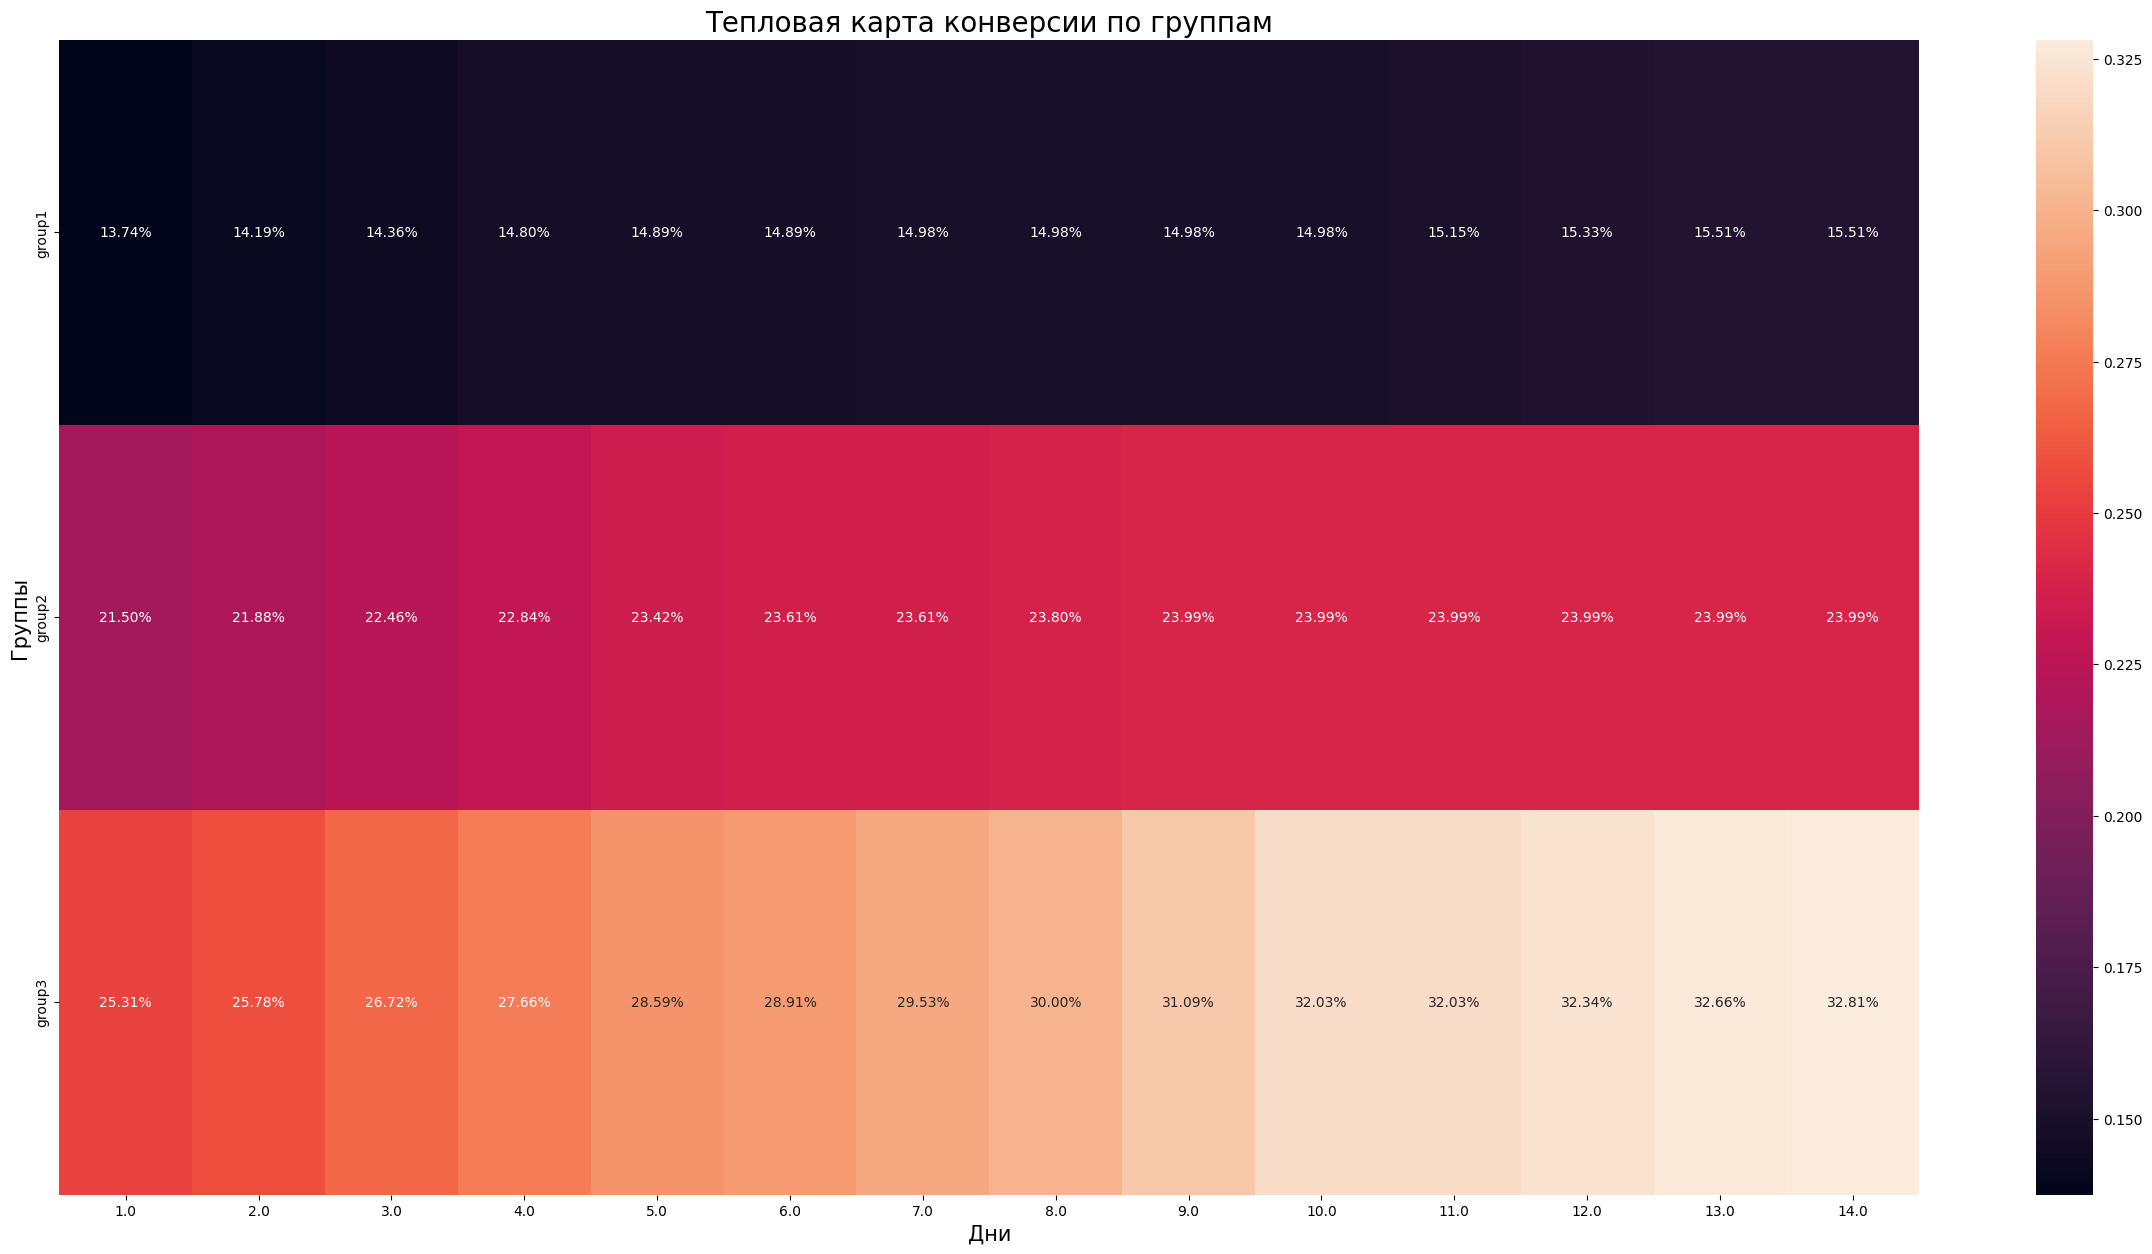

In [ ]:
plt.figure(figsize=(30, 15))  # задаём размер графика
sns.heatmap(
    conversion_grouped.drop(columns=['cohort_size', 0]),  # удаляем размеры когорт и первый день
    annot=True,  # включаем подписи
    fmt='.2%',  # переводим значения в проценты
)
plt.title('Тепловая карта конверсии по группам', fontsize=20) 
plt.ylabel('Группы', fontsize=15)
plt.xlabel('Дни', fontsize=15)
plt.show()

1.   У группы 1 конверсия в целевое действие достигает 15,51% к 14 дню
2.   Конверсия пользователей группы 2 достигает 23,99%
3.   Конверсия пользователей группы 3 достигает 32,81%

**В конверсии в целевое действие группа 3 так же лидирует** 

# Вывод сегментации 

**Отвечая на основные вопросы исследования:**
1.   Между возвращением в приложение и частотой действий есть прямая взаимосвязь - чем больше действий, тем выше retantion rate. 
2.   Такая же взаимосвязь есть и между количеством действий и конверсией - чем активней пользователь, тем чаще он делает целевое действие. В нашем случае - просматривает контакты.

**Предположение о том, что пользователи, с превышающим среднее количеством действий чаще вовзращаются, оправдалось. И напротив, оказалось неверным преплоложение о том, что пользователи с наибольшим количеством действий реже просматривают контакты. Такие юзеры активны во всех смыслах.**




# Проверка гипотез

## Конверсия пользователей из yandex и google

Первое утверждение, которое нам предстоит проверить звучит как "Пользователи из yandex и google демонстрируют разную конверсию". На его основе мы выдвигаем нулевую гипотезу "Пользователи из yandex и google демонстрируют равную конверсию". Альтезнативная же гипотеза, в случае, если данные будут протироваречить нулевой гипотезе, будет звучать как "Пользователи из yandex и google демонстрируют разную конверсию".

Подготовим данные для удобной проверки

In [ ]:
google_id = (df[(df['source']=='google')&(df['user_id'])]['user_id']).nunique() #количество юзеров от гугл
yandex_id = (df[(df['source']=='yandex')&(df['user_id'])]['user_id']).nunique() #количество юзеров от яндекс

google_conv = (df[(df['source']=='google')&(df['event_name']=='contacts_show')]['user_id']).nunique() #количество целевых дейтсвий от гугл
yandex_conv = (df[(df['source']=='yandex')&(df['event_name']=='contacts_show')]['user_id']).nunique() #количество целевых дейтсвий от яндекс

**Гипотезы:**

**Н0: Пользователи из yandex и google демонстрируют равную конверсию**

**Н1: Пользователи из yandex и google демонстрируют разную конверсию** 

In [ ]:
alpha = 0.05  # критический уровень статистической значимости

purchases = np.array([google_conv, yandex_conv])
leads = np.array([google_id, yandex_id])

p1 = purchases[0]/leads[0]

p2 = purchases[1]/leads[1]

print(purchases[0], purchases[1], leads[0], leads[1])

print(purchases[0] ,purchases[1] , leads[0],leads[1] )

p_combined = (purchases[0] + purchases[1]) / (leads[0] + leads[1])

difference = p1 - p2 

z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/leads[0] + 1/leads[1]))

distr = st.norm(0, 1)  

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    )

275 478 1129 1934
275 478 1129 1934
p-значение:  0.8244316027993777
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


**Нулевая гипотеза не отвергнута, а значит пользователи из yandex и google демонстрируют равную конверсию**

## Возвращаемость пользователей из yandex и google

Первое утверждение, которое нам предстоит проверить звучит как "Пользователи из yandex и google демонстрируют разную возвращаемость". На его основе мы выдвигаем нулевую гипотезу "Пользователи из yandex и google демонстрируют равную возвращаемость". Альтезнативная же гипотеза, в случае, если данные будут протироваречить нулевой гипотезе, будет звучать как "Пользователи из yandex и google демонстрируют разную возвращаемость".

Расчитаем retantion по ранее заданным параметрам, изменив только dimensions на источник

In [ ]:
dimensions=['source']

retention_raw, retention_grouped_source, retention_in_time = get_retention(
    profiles, df, observation_date, horizon_days, dimensions)

Вынесем все доли в столбец и уберем размеры когорты 

In [ ]:
retention_grouped_source = retention_grouped_source.drop('cohort_size', axis=1)
retention_grouped_source = retention_grouped_source.drop(0, axis=1)
retention_grouped_source = retention_grouped_source.T 

За основу для теста возьмем доли возвращаемости обоих сервисов

**Гипотезы:**

**Н0: Пользователи из yandex и google демонстрируют равную возвращаемость**

**Н1: Пользователи из yandex и google демонстрируют разную возвращаемость** 

In [ ]:
google = retention_grouped_source['google']
yandex = retention_grouped_source['yandex']

alpha = .05

results = st.ttest_ind(
    google, yandex)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.9873389180546288
Не получилось отвергнуть нулевую гипотезу


**Нулевая гипотеза не отвергнута, а значит пользователи из yandex и google демонстрируют равную возвращаемость на седьмой день**

# Вывод исследования 

**В этом исследовании мобильного приложения мы прошли через несколько основных этапов. Каждый из них дал нам пищу для размышлений и основу для прогнозов. Кратко пройдемся по каждому их них:**

1. ***Ознакомление и предобработка***

  - выгрузка данных
  - переимонование столбцов
  - обработка пропусков
  - изменение типов данных
  - вычисление и добавление дополнительных данных

2. ***Анализ данных***

**По пользователям:**

   - максимальный процент retantion rate - 17
   - медианное время в приложении - 16.3 минуты
   - медианное количество сессий - 1
   - медианное время сессии - 9.8 минут 
   - медианное количество действий для пользователя - 9
   - конверсия уникального пользователя в просмотр контакта - 22,85
   
**По действиям:**
   - самое частое действие - просмотр рекомендованных объявлений
   - самый активный по действиям день - понедельник

3. ***Сегментация данных***

Пользователи были разделены на три группы в зависимости от количества дейтсвий в приложении.
  
  - Возвращаемость напрямую коррелирует с количеством действий в приложении - чем их больше, тем выше возвращаемость
  - Конверсия в целевое действие так же напрямую коррелирует с количеством совершенных действий

4.  ***Проверка гипотез***

В результате проверки гипотез были выявлены следущие факты:

   - Пользователи из yandex и google демонстрируют равную конверсию
   - Пользователи из yandex и google демонстрируют равную возвращаемость

## Рекомендации 

* Исходя из вывода, наиболее актуальной стратегией для увеличения прибыли будет 
увеличивать вовлеченность юзеров в приложение - акции для постоянных покупателей, пуш-уведомление и т.д. Тем самым, увеличивая количество действий в приложении, мы будем увеличивать как показатели возвращения в приложение, так и конверию в ключевое действие. 
* Разделение пользователей из разных источников на данный момент неактульно - они показывают как равную возвращаемость, так и равную конверсию в целевое действие.